In [1]:
#Import library yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

import warnings
warnings.filterwarnings('ignore') 

In [16]:
df = pd.read_csv('indeks-standar-pencemar-udara-di-spku-bulan-januari-juli-2021.csv')
df.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI1 (Bunderan HI),38.0,53.0,29.0,6.0,31.0,13.0,53,PM25,SEDANG
1,2021-01-02,DKI1 (Bunderan HI),27.0,46.0,27.0,7.0,47.0,7.0,47,O3,BAIK
2,2021-01-03,DKI1 (Bunderan HI),44.0,58.0,25.0,7.0,40.0,13.0,58,PM25,SEDANG
3,2021-01-04,DKI1 (Bunderan HI),30.0,48.0,24.0,4.0,32.0,7.0,48,PM25,BAIK
4,2021-01-05,DKI1 (Bunderan HI),38.0,53.0,24.0,6.0,31.0,9.0,53,PM25,SEDANG


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   1060 non-null   object 
 1   stasiun   1060 non-null   object 
 2   pm10      1024 non-null   float64
 3   pm25      980 non-null    float64
 4   so2       1041 non-null   float64
 5   co        1035 non-null   float64
 6   o3        1024 non-null   float64
 7   no2       1038 non-null   float64
 8   max       1060 non-null   int64  
 9   critical  1052 non-null   object 
 10  categori  1060 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 91.2+ KB


In [20]:
df = df.drop(['tanggal','stasiun'],axis=1)

In [21]:
df.isnull().sum(axis=0)

pm10        36
pm25        80
so2         19
co          25
o3          36
no2         22
max          0
critical     8
categori     0
dtype: int64

In [24]:
df = df.dropna(axis=0)

In [25]:
df.isnull().sum(axis=0)

pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 1059
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      902 non-null    float64
 1   pm25      902 non-null    float64
 2   so2       902 non-null    float64
 3   co        902 non-null    float64
 4   o3        902 non-null    float64
 5   no2       902 non-null    float64
 6   max       902 non-null    int64  
 7   critical  902 non-null    object 
 8   categori  902 non-null    object 
dtypes: float64(6), int64(1), object(2)
memory usage: 70.5+ KB


Text(0.5, 1.0, 'General Statistics of Indeks Standar Pencemaran Udara Dataset')

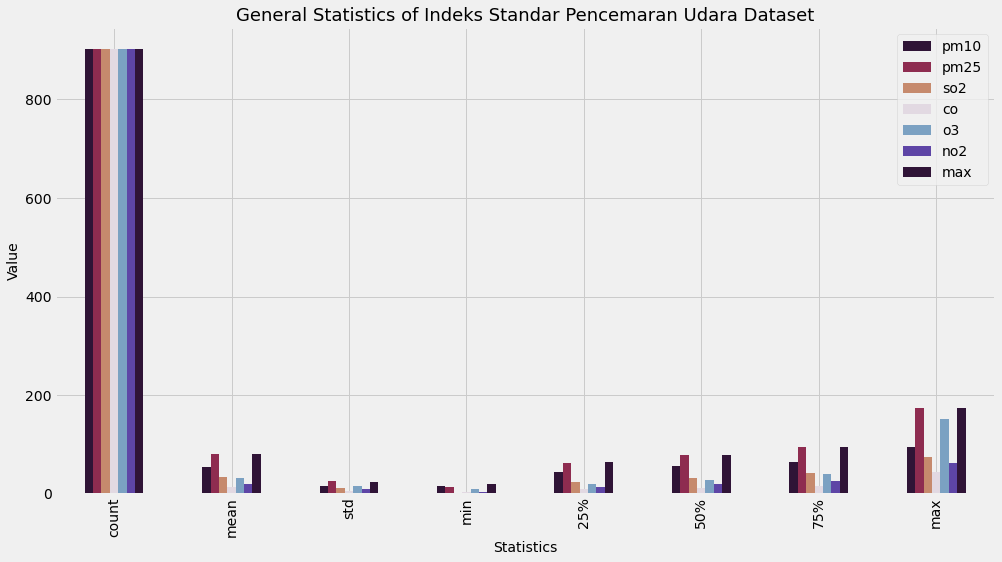

In [27]:
df.describe().plot(kind = "bar", figsize = (15,8), colormap="twilight_shifted_r")
plt.xlabel('Statistics',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.title("General Statistics of Indeks Standar Pencemaran Udara Dataset",fontsize=18)

Text(0.5, 1.0, 'Category Type Count')

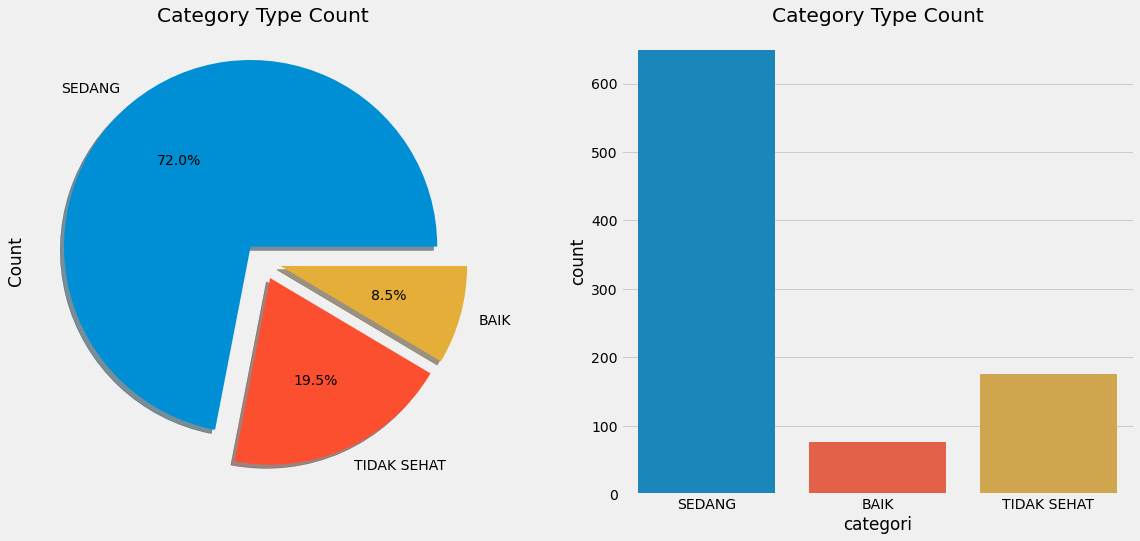

In [36]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['categori'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Category Type Count')
ax[0].set_ylabel('Count')
sns.countplot('categori',data=df,ax=ax[1])
ax[1].set_title('Category Type Count')

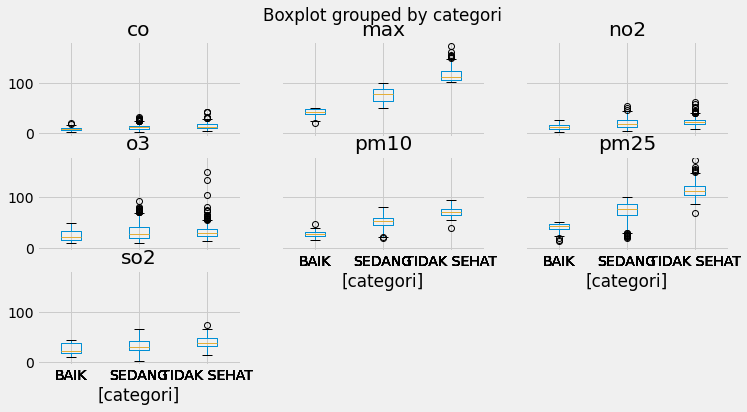

In [38]:
df.boxplot(by="categori", figsize=(12, 6))
pass

<AxesSubplot:xlabel='categori', ylabel='co'>

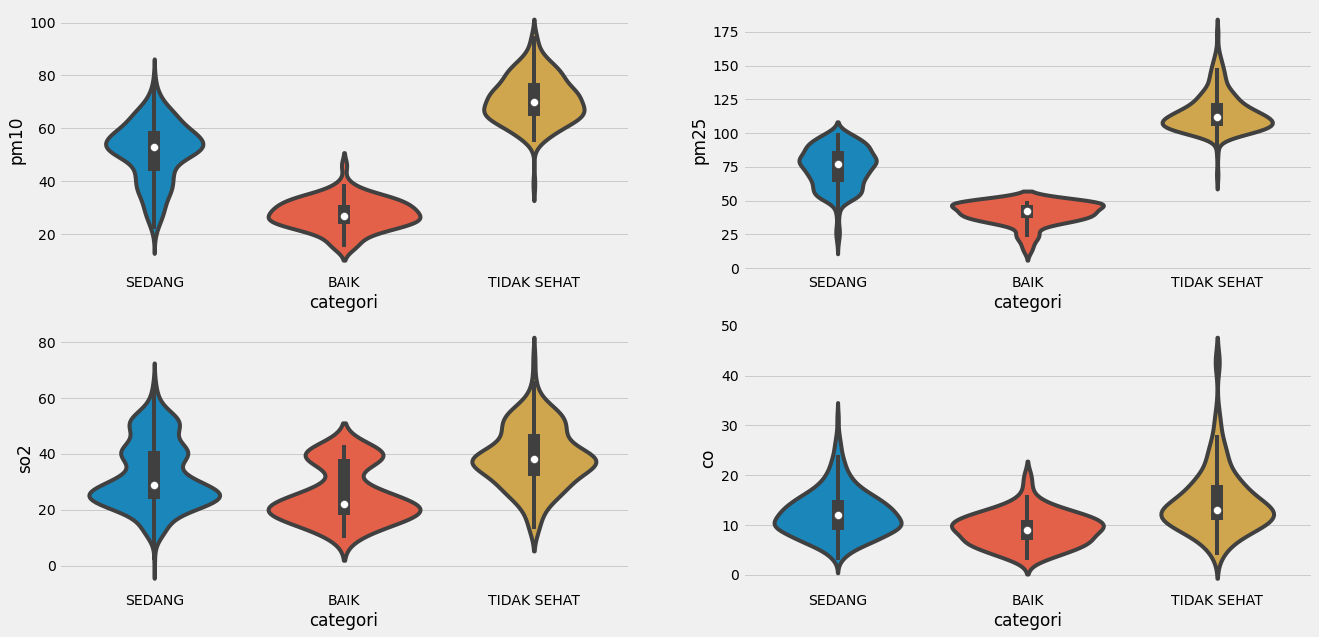

In [61]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.violinplot(x='categori',y='pm10',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='categori',y='pm25',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='categori',y='so2',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='categori',y='co',data=df)

<AxesSubplot:xlabel='categori', ylabel='max'>

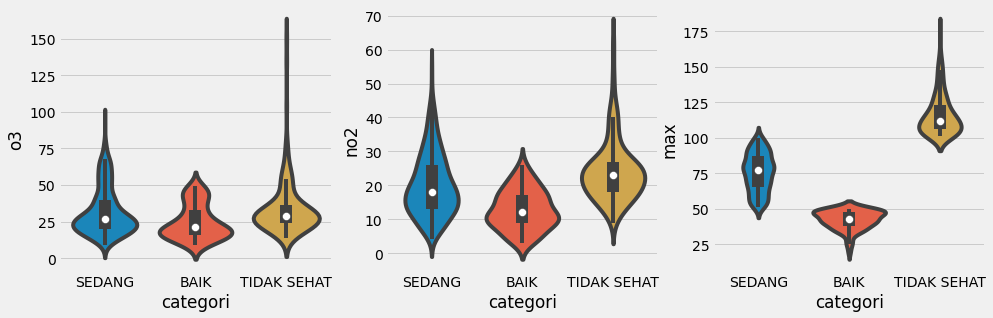

In [64]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.violinplot(x='categori',y='o3',data=df)
plt.subplot(2,4,2)
sns.violinplot(x='categori',y='no2',data=df)
plt.subplot(2,4,3)
sns.violinplot(x='categori',y='max',data=df)

In [33]:
df['critical'].nunique()

4

Text(0.5, 1.0, 'Critical Type Count')

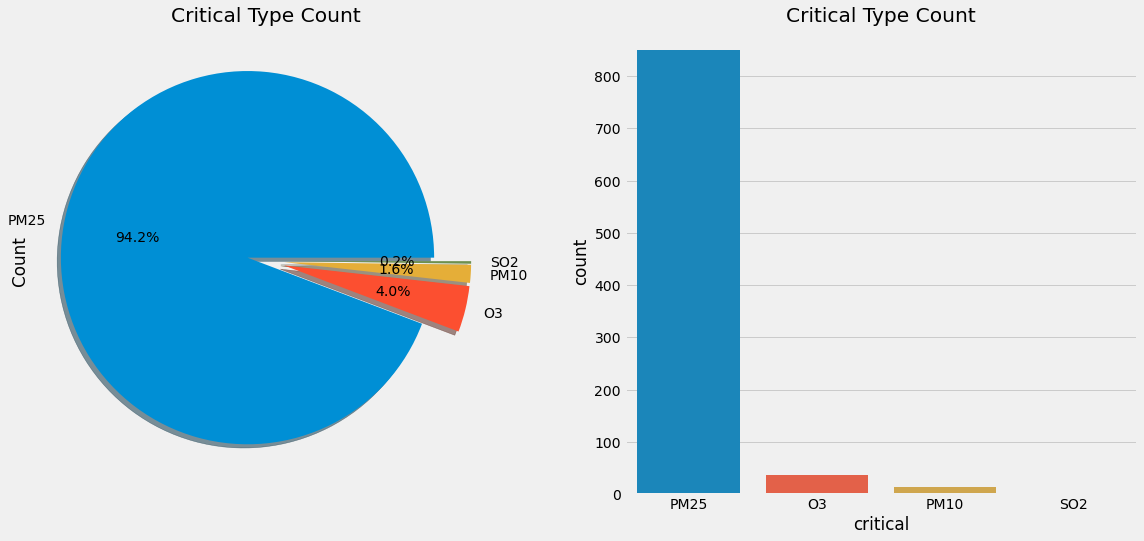

In [35]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['critical'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Critical Type Count')
ax[0].set_ylabel('Count')
sns.countplot('critical',data=df,ax=ax[1])
ax[1].set_title('Critical Type Count')

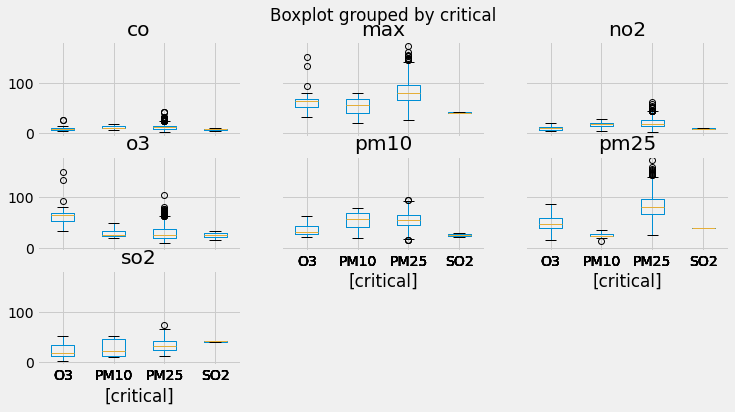

In [37]:
df.boxplot(by="critical", figsize=(12, 6))
pass

<AxesSubplot:xlabel='critical', ylabel='co'>

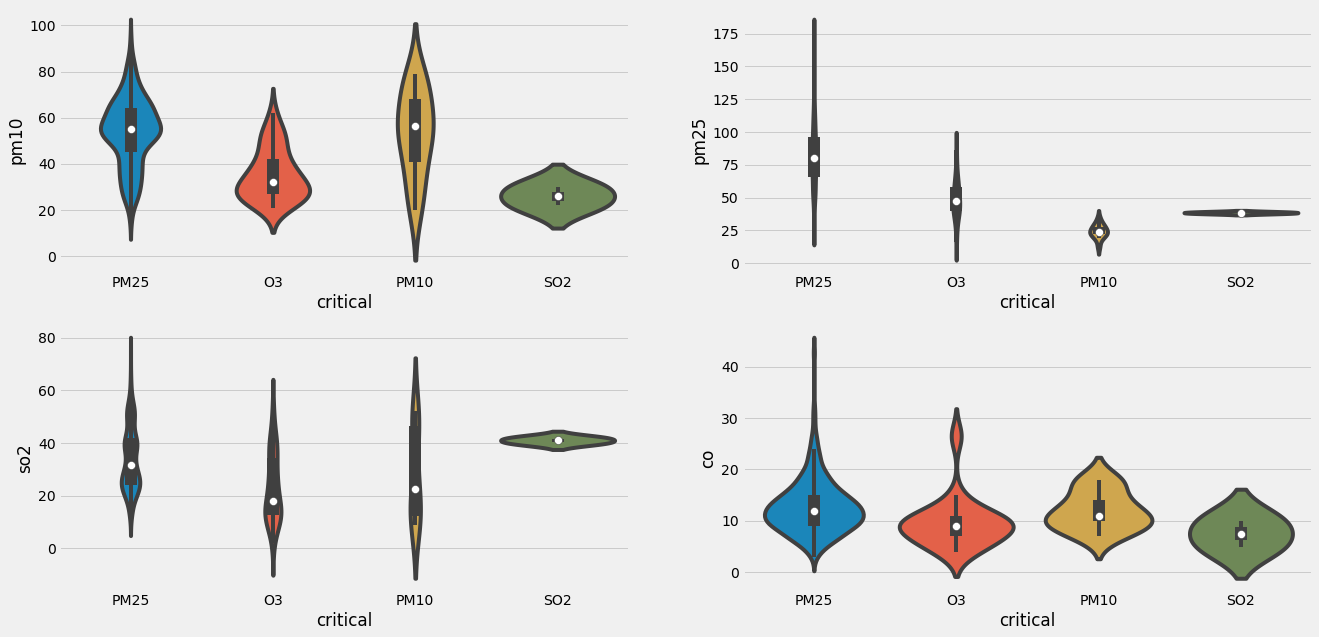

In [71]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.violinplot(x='critical',y='pm10',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='critical',y='pm25',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='critical',y='so2',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='critical',y='co',data=df)

<AxesSubplot:xlabel='critical', ylabel='max'>

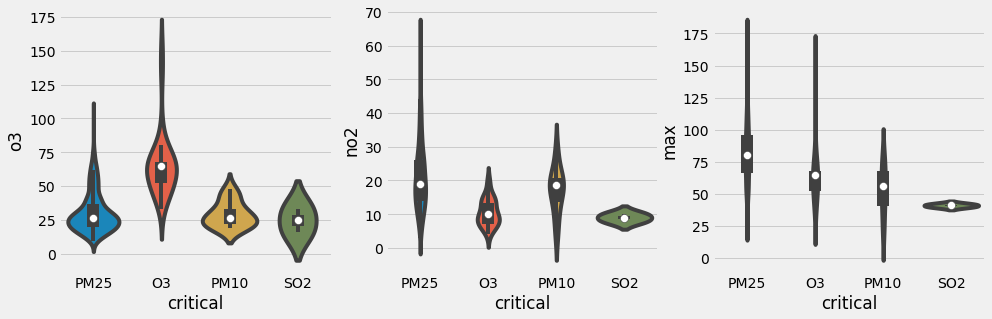

In [70]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.violinplot(x='critical',y='o3',data=df)
plt.subplot(2,4,2)
sns.violinplot(x='critical',y='no2',data=df)
plt.subplot(2,4,3)
sns.violinplot(x='critical',y='max',data=df)